In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,087 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [2]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# fm.rebuild()

NanumGothic


In [3]:
import warnings
warnings.filterwarnings('ignore')

import random
import os
import pandas as pd
from pandas import datetime
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False) # 한글폰트를 사용하며 마이너스폰트가 깨져 이렇게 설정
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina' # 폰트 선명하게 보이기 위해
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(41) # Seed 고정

In [5]:
train = pd.read_csv('/content/drive/MyDrive/DACON/LG_aimers/train.csv') #.drop(columns=['제품']) # 판매량
brand_keyword = pd.read_csv('/content/drive/MyDrive/DACON/LG_aimers/brand_keyword_cnt.csv') # 브랜드 연관키워드 언급 정도
product_info = pd.read_csv('/content/drive/MyDrive/DACON/LG_aimers/product_info.csv') # 제품 정보
sales = pd.read_csv('/content/drive/MyDrive/DACON/LG_aimers/sales.csv') # 총 판매금액

In [8]:
train.head()

ID                제품             대분류             중분류  \
0  SAMPLE_00000  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1  SAMPLE_00001  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2  SAMPLE_00002  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3  SAMPLE_00003  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4  SAMPLE_00004  B002-00002-00004  B002-C001-0003  B002-C002-0008   

              소분류         브랜드         쇼핑몰  2022-01-01  2022-01-02  2022-01-03  \
0  B002-C003-0038  B002-00001  S001-00001           0           0           0   
1  B002-C003-0044  B002-00002  S001-00001           0           0           0   
2  B002-C003-0044  B002-00002  S001-00001           0           0           0   
3  B002-C003-0044  B002-00002  S001-00001           0           0           0   
4  B002-C003-0044  B002-00002  S001-00010           0           0           0   

   ...  2023-04-15  2023-04-16  2023-04-17  2023-04-18  2023-04-19  \
0  ...           0           0           0           0           0   
1  ...           2           0           2           0           2   
2  ...           0           0           0           0           0   
3  ...           0           0           0           0           0   
4  ...          10           6           4           4           4   

   2023-04-20  2023-04-21  2023-04-22  2023-04-23  2023-04-24  
0           0           0           0           0           0  
1           2           1           0           0           0  
2           0           0           0           0           0  
3           0           0           0           0           0  
4           0           0           0           0           8  

[5 rows x 486 columns]

In [9]:
product_info.head()

제품                                               제품특성
0  B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1  B002-02376-00001                                        700mg x 28정
2  B002-03735-00001  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3  B002-03735-00003  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4  B002-02769-00001  HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...

# Keyword

In [10]:
merged_df = pd.merge(train[['ID', '제품', '대분류', '중분류', '소분류', '브랜드']], product_info, on='제품', how='left')
merged_df.head()

ID                제품             대분류             중분류  \
0  SAMPLE_00000  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1  SAMPLE_00001  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2  SAMPLE_00002  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3  SAMPLE_00003  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4  SAMPLE_00004  B002-00002-00004  B002-C001-0003  B002-C002-0008   

              소분류         브랜드  \
0  B002-C003-0038  B002-00001   
1  B002-C003-0044  B002-00002   
2  B002-C003-0044  B002-00002   
3  B002-C003-0044  B002-00002   
4  B002-C003-0044  B002-00002   

                                                제품특성  
0  헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [ ]:
merged_df.iloc[0]['제품특성']

'헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력 세부제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 세부제품특징:부드러운 발림 세부제품특징:영양공급 용량:30ml(g) :1개 50ml'

In [11]:
# !pip install transformers

In [12]:
import re

def remove_special_characters(text):
    cleaned_text = re.sub('[^A-Za-z0-9가-힣 ]+', ' ', str(text))  # 문자열로 변환
    return cleaned_text.strip()

# NaN 값을 빈 문자열로 대체
merged_df['제품특성'].fillna('', inplace=True)

# 제품특성 칼럼에 특수문자 제거 및 정리 적용
merged_df['제품특성'] = merged_df['제품특성'].apply(remove_special_characters)

merged_df

ID                제품             대분류             중분류  \
0      SAMPLE_00000  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1      SAMPLE_00001  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2      SAMPLE_00002  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3      SAMPLE_00003  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4      SAMPLE_00004  B002-00002-00004  B002-C001-0003  B002-C002-0008   
...             ...               ...             ...             ...   
28889  SAMPLE_28889  B002-03798-00046  B002-C001-0003  B002-C002-0008   
28890  SAMPLE_28890  B002-03799-00002  B002-C001-0003  B002-C002-0008   
28891  SAMPLE_28891  B002-03799-00003  B002-C001-0003  B002-C002-0008   
28892  SAMPLE_28892  B002-03799-00004  B002-C001-0003  B002-C002-0008   
28893  SAMPLE_28893  B002-03799-00005  B002-C001-0003  B002-C002-0008   

                  소분류         브랜드  \
0      B002-C003-0038  B002-00001   
1      B002-C003-0044  B002-00002   
2      B002-C003-0044  B002-00002   
3      B002-C003-0044  B002-00002   
4      B002-C003-0044  B002-00002   
...               ...         ...   
28889  B002-C003-0044  B002-03798   
28890  B002-C003-0042  B002-03799   
28891  B002-C003-0044  B002-03799   
28892  B002-C003-0044  B002-03799   
28893  B002-C003-0044  B002-03799   

                                                    제품특성  
0      헤어타입 모든 모발용 제품형태 스프레이형 주요제품특징 머릿결개선 주요제품특징 흡수력...  
1                                                         
2                                                         
3                                                         
4                                                         
...                                                  ...  
28889                                                     
28890                                                     
28891                                                     
28892         종류 이유식보관용기 특징 전자레인지사용 재질 실리콘 3개세트 LLG508S3  
28893         종류 이유식보관용기 특징 전자레인지사용 재질 실리콘 3개세트 LLG509S3  

[28894 rows x 7 columns]

In [13]:
merged_df['제품특성'] = merged_df['제품특성'].astype('str')

In [14]:
df1 = merged_df[merged_df['대분류'] == 'B002-C001-0001']
df2 = merged_df[merged_df['대분류'] == 'B002-C001-0002']
df3 = merged_df[merged_df['대분류'] == 'B002-C001-0003']
df4 = merged_df[merged_df['대분류'] == 'B002-C001-0004']
df5 = merged_df[merged_df['대분류'] == 'B002-C001-0005']

In [16]:
from collections import Counter

stopwords = [
    '하루',
    '주요',
    '식약처고시',
    '식약처인증',
    '섭취대상',
    '총',
    '주요',
    '주요제품특징',
    '특징','타입','g','남녀공용'
]

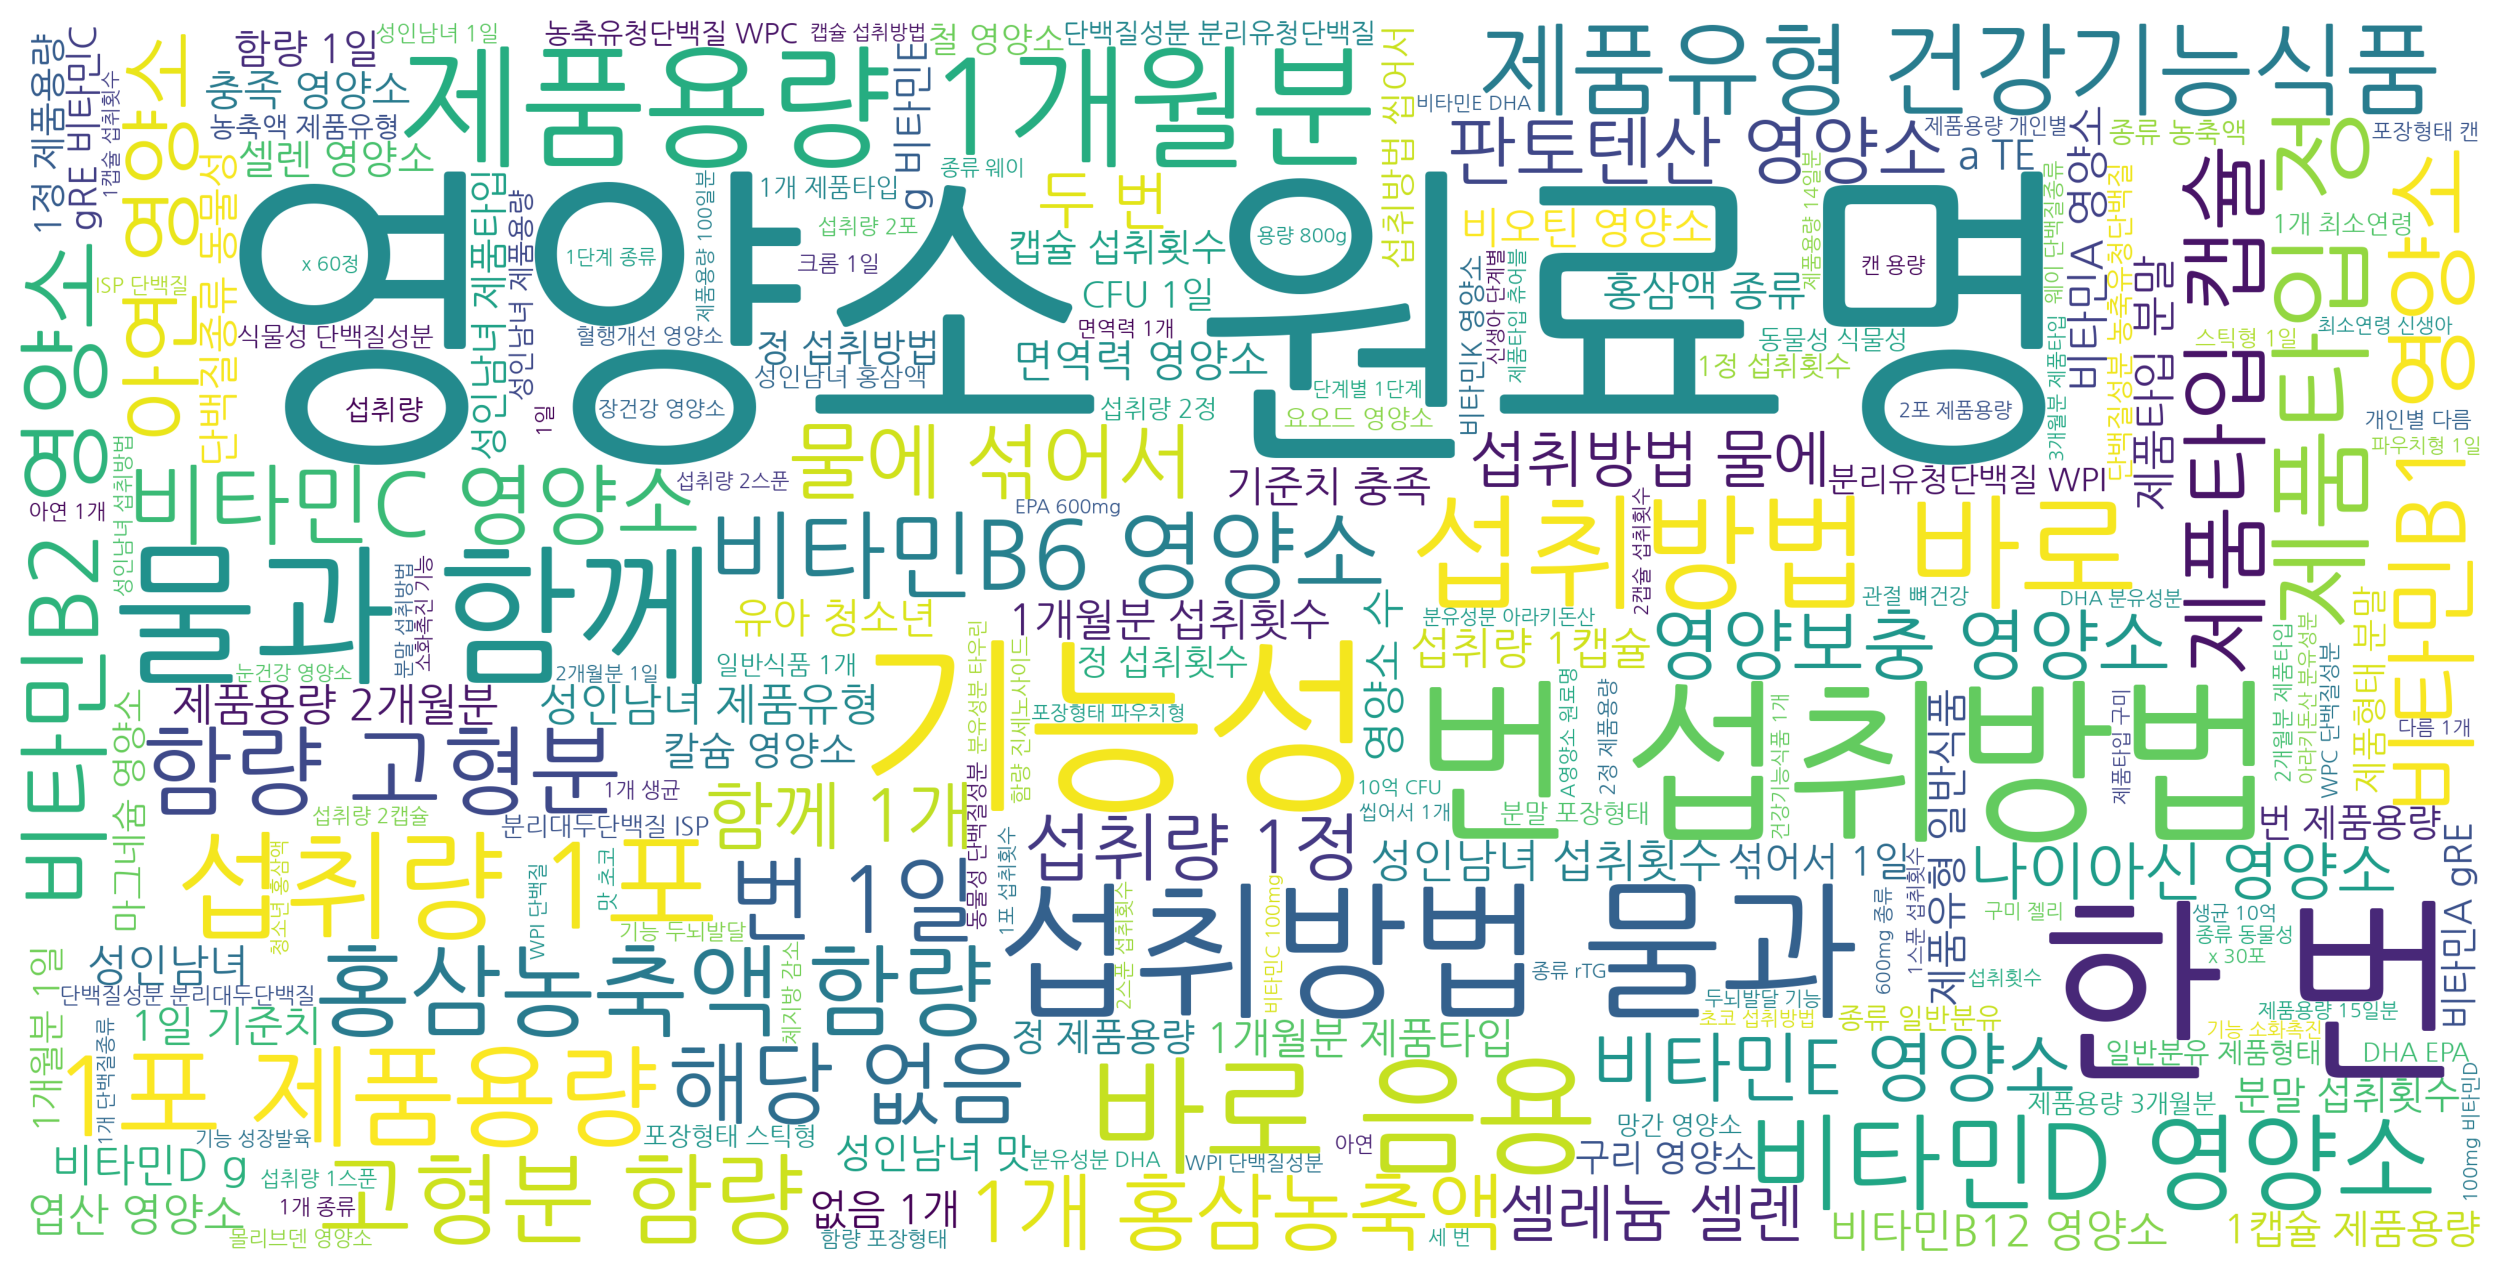

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

df1 = ' '.join(df1['제품특성'].dropna())  # NaN 값 제거

title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000, font_path=FONT_PATH).generate(df1)
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

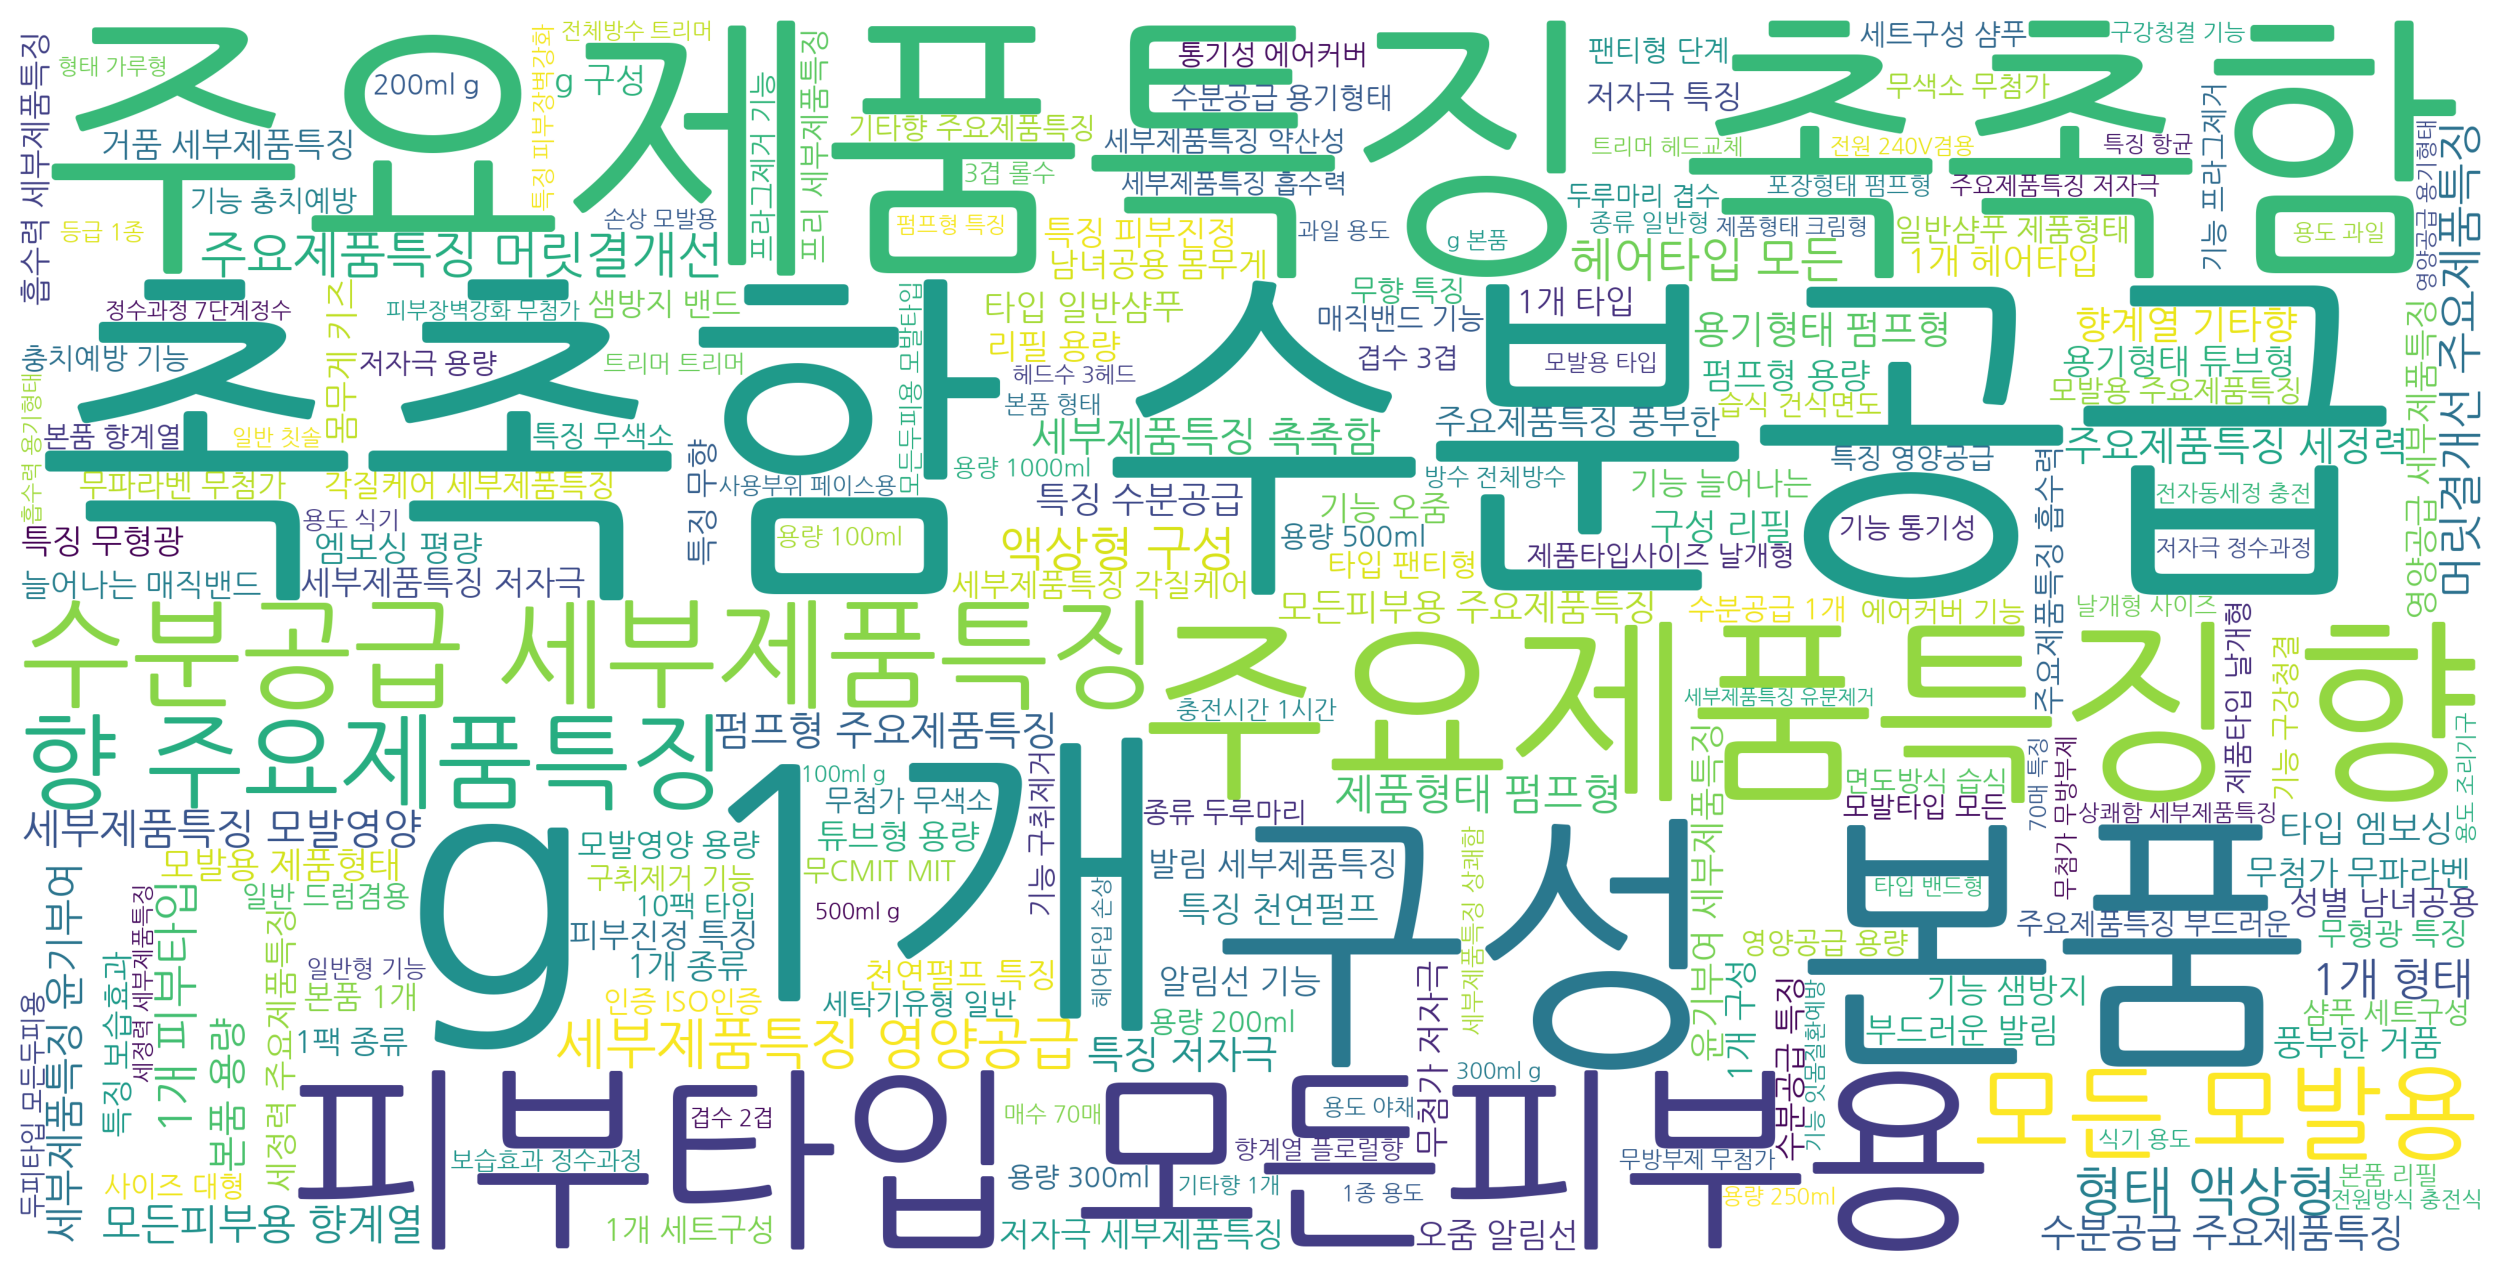

In [ ]:
df2 = ' '.join(df2['제품특성'].dropna())  # NaN 값 제거

title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000, font_path=FONT_PATH).generate(df2)
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

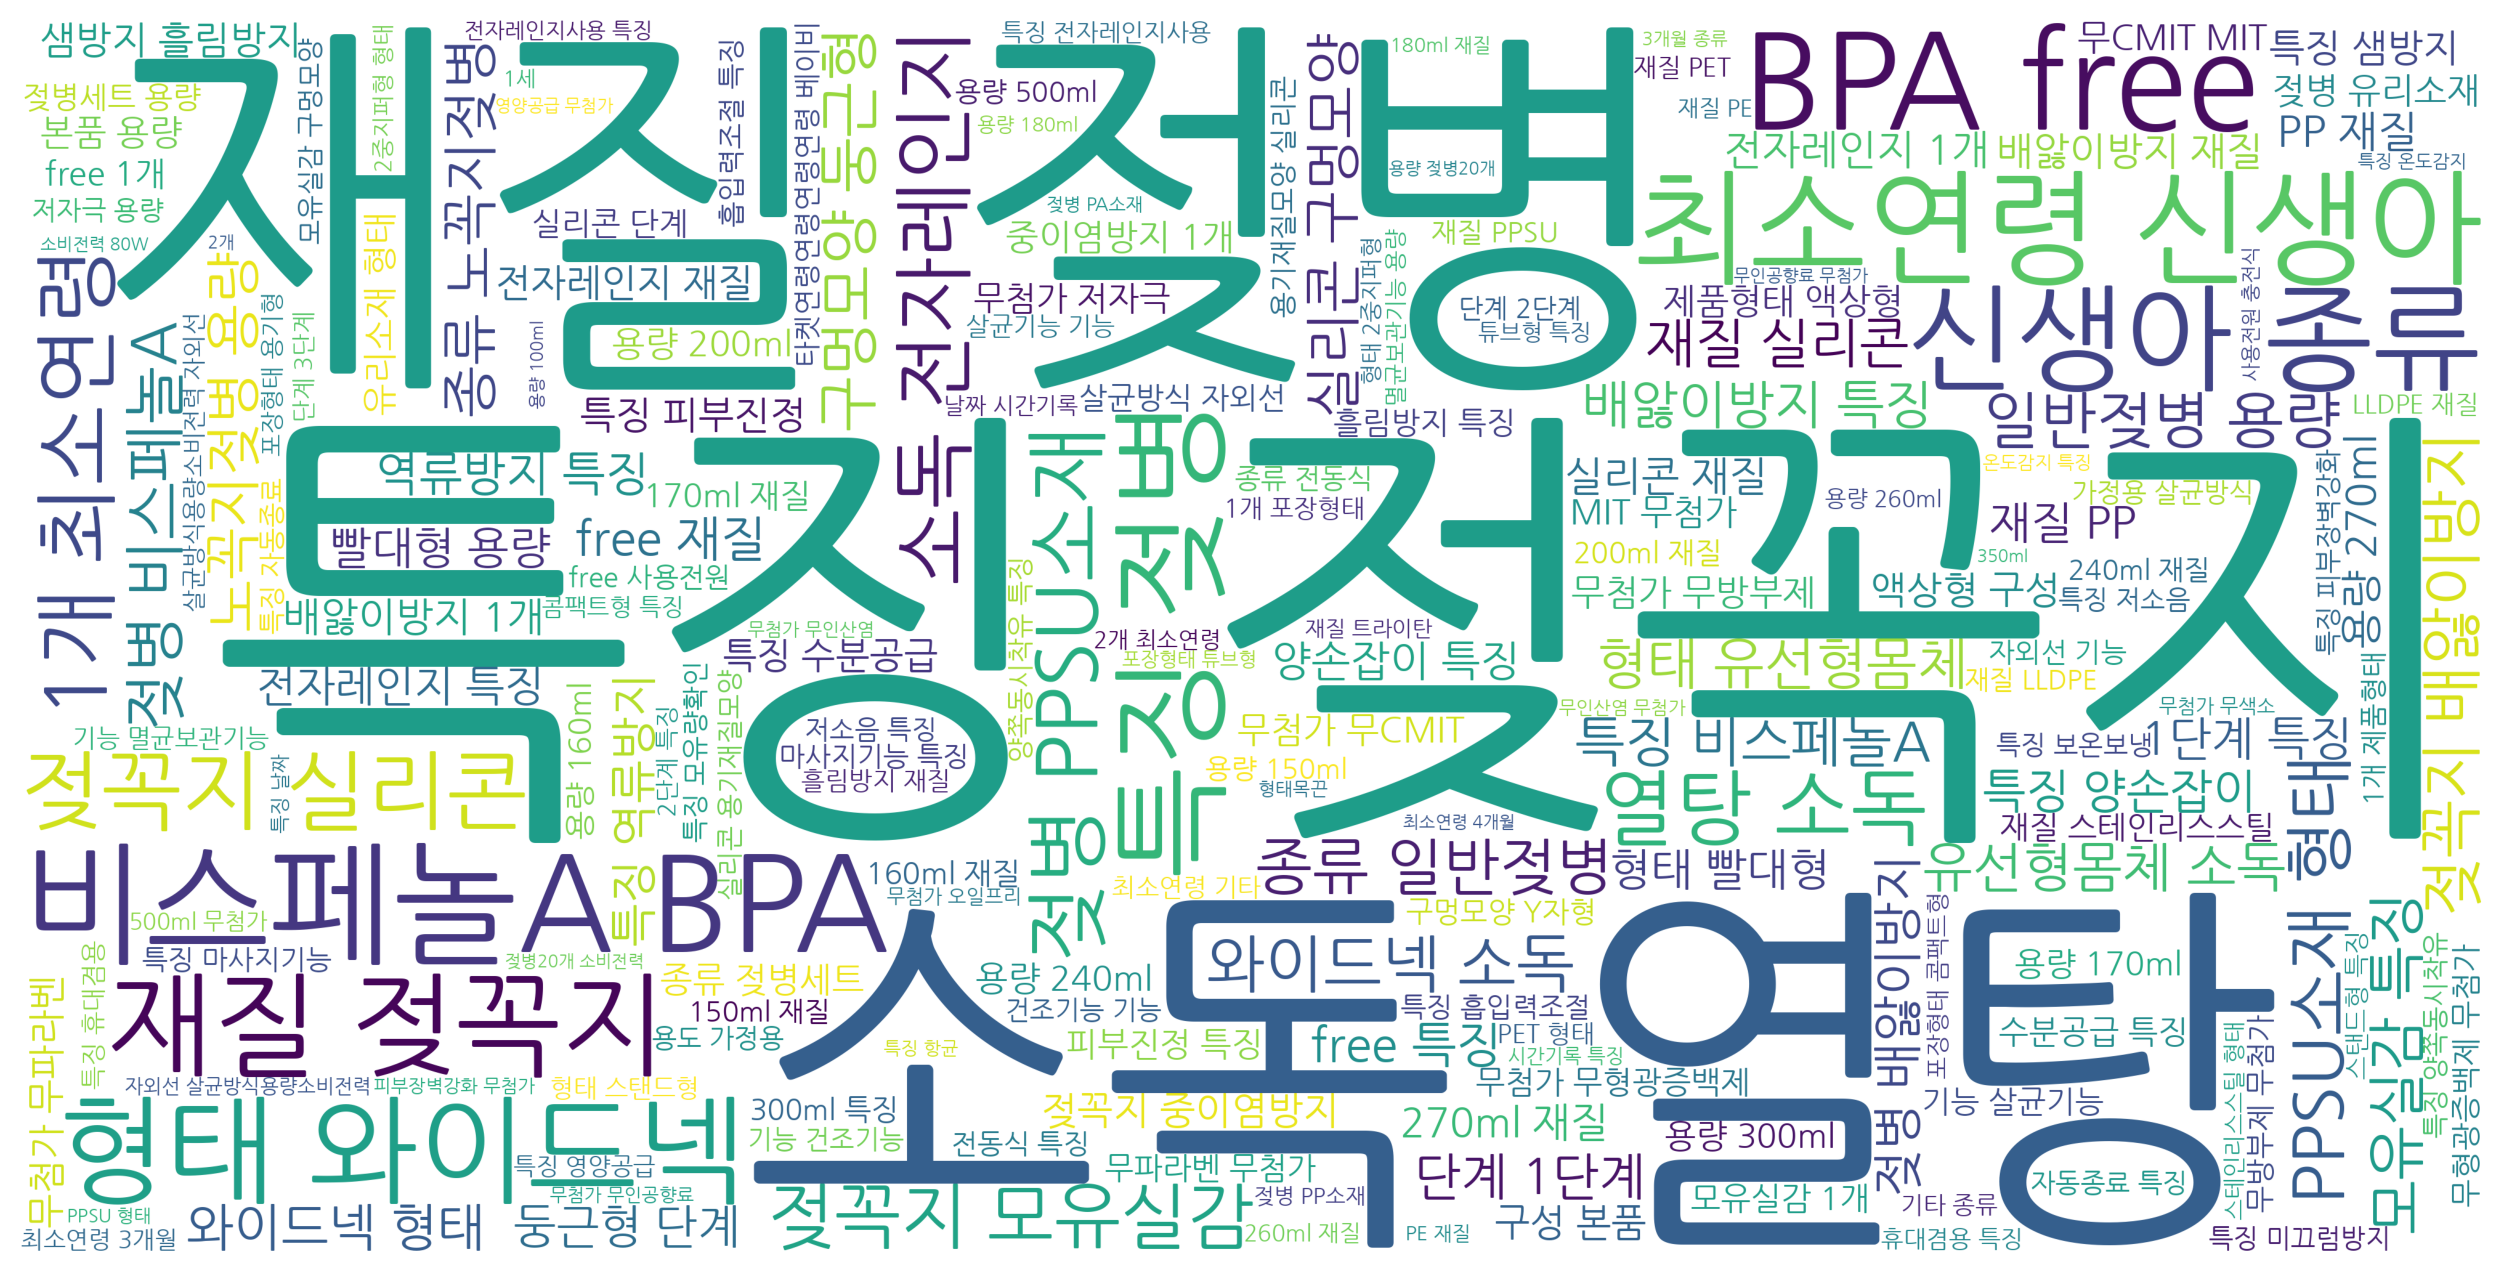

In [ ]:
df3 = ' '.join(df3['제품특성'].dropna())  # NaN 값 제거

title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000, font_path=FONT_PATH).generate(df3)
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

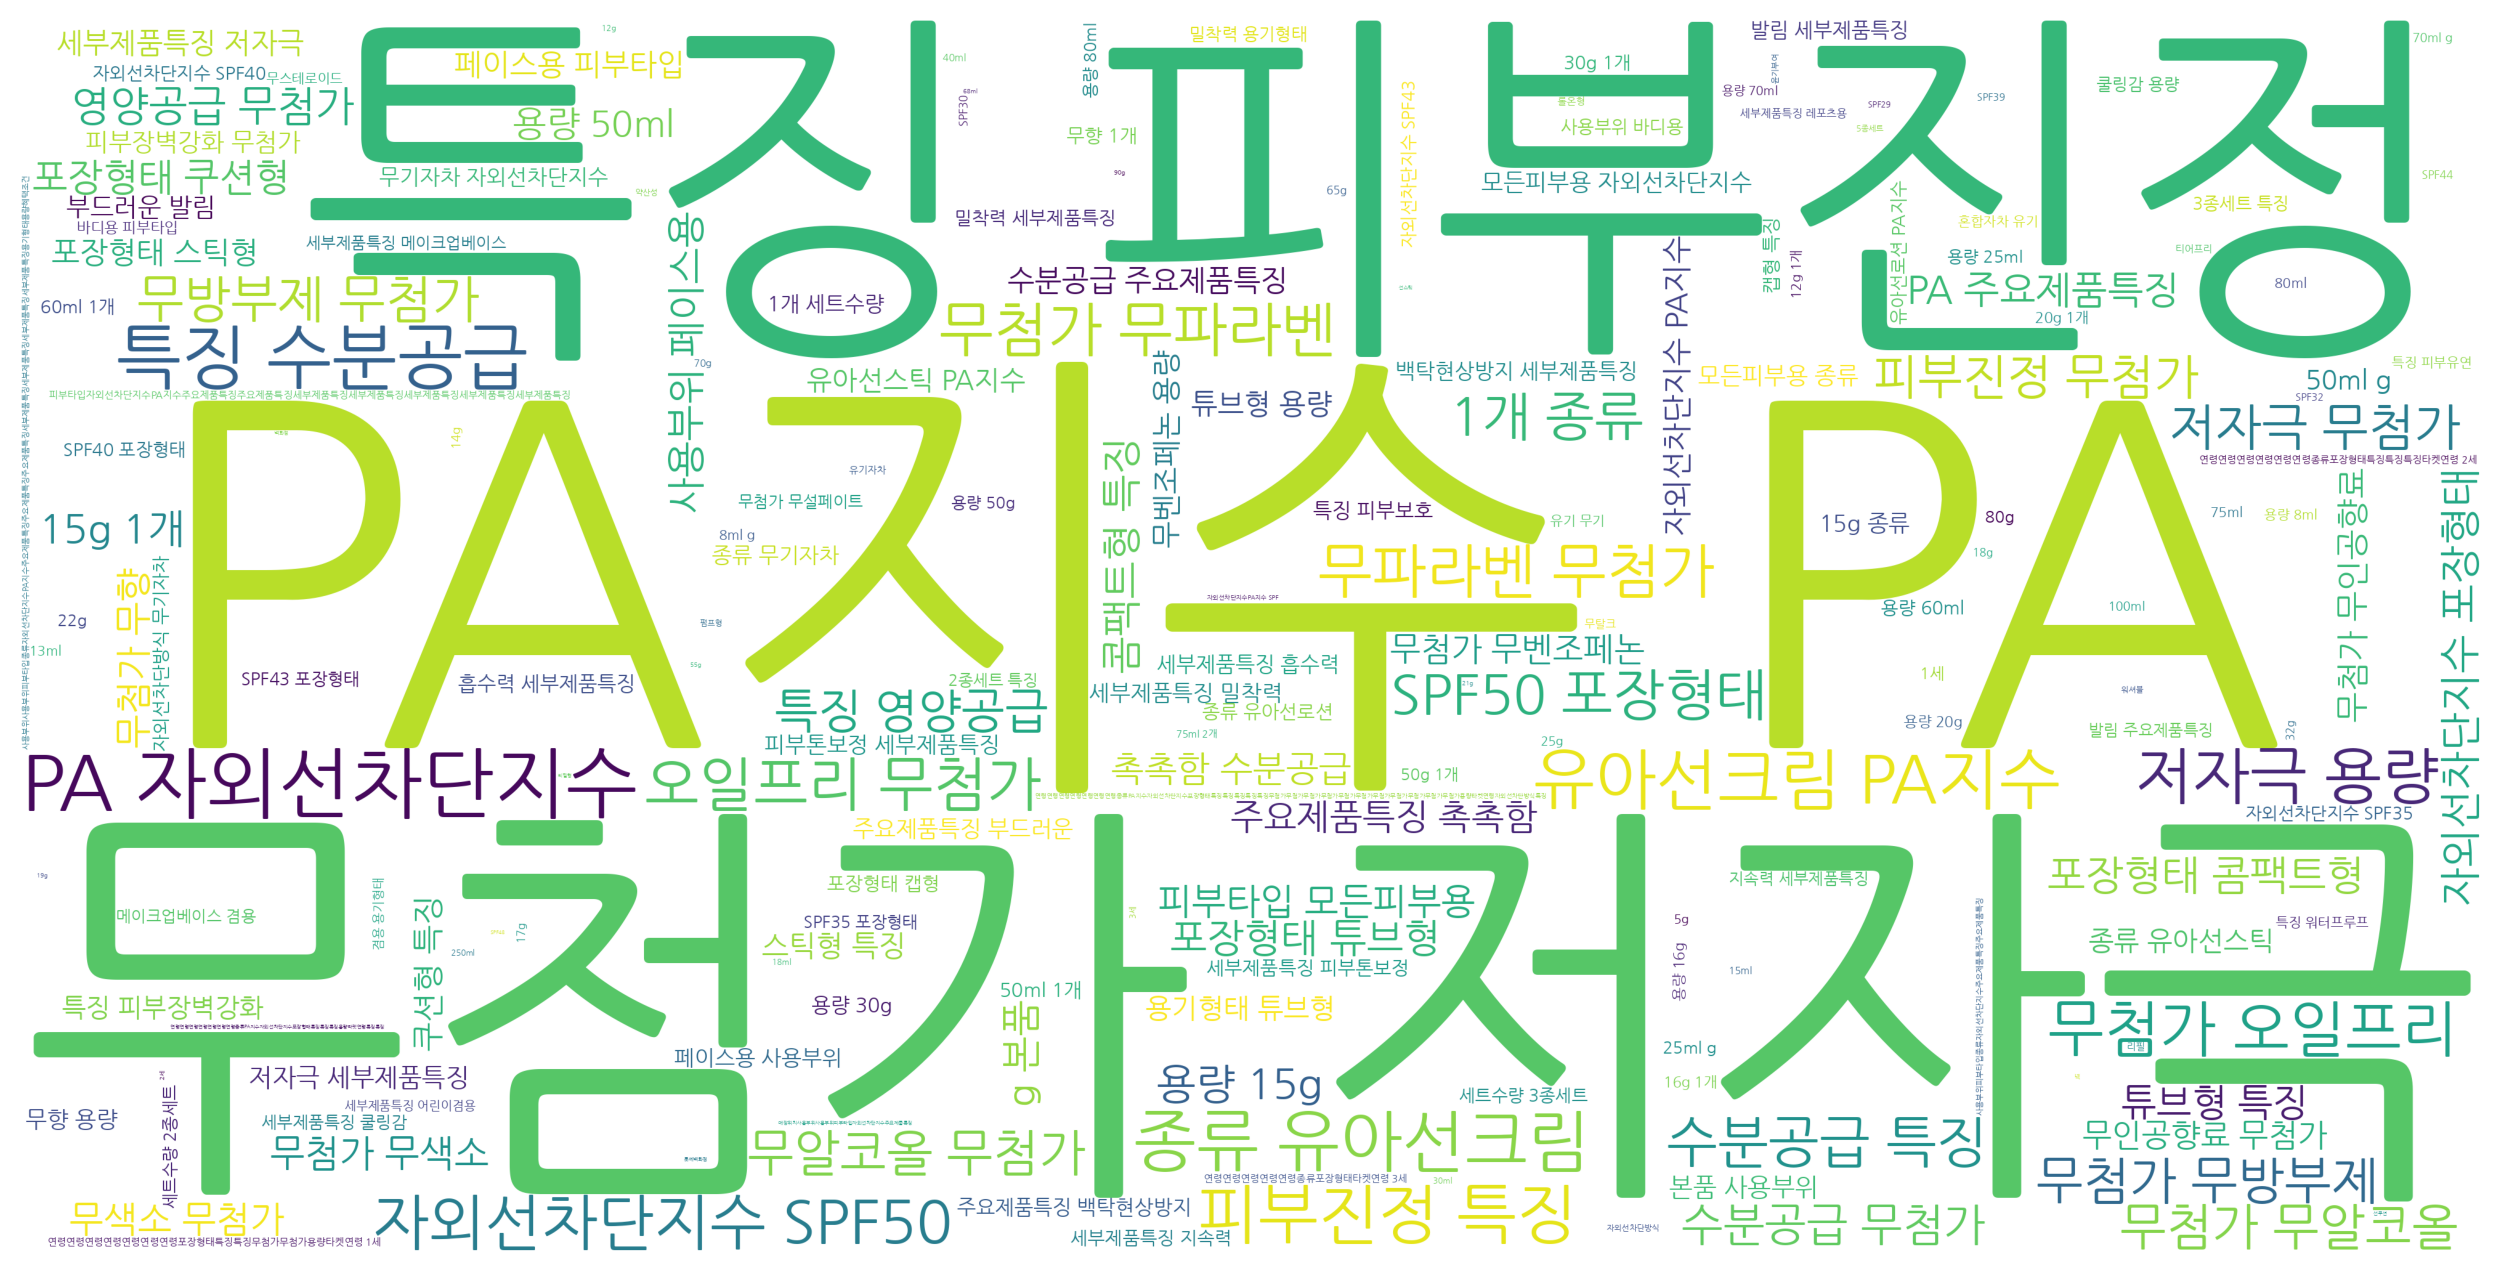

In [ ]:
df4 = ' '.join(df4['제품특성'].dropna())  # NaN 값 제거

title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000, font_path=FONT_PATH).generate(df4)
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

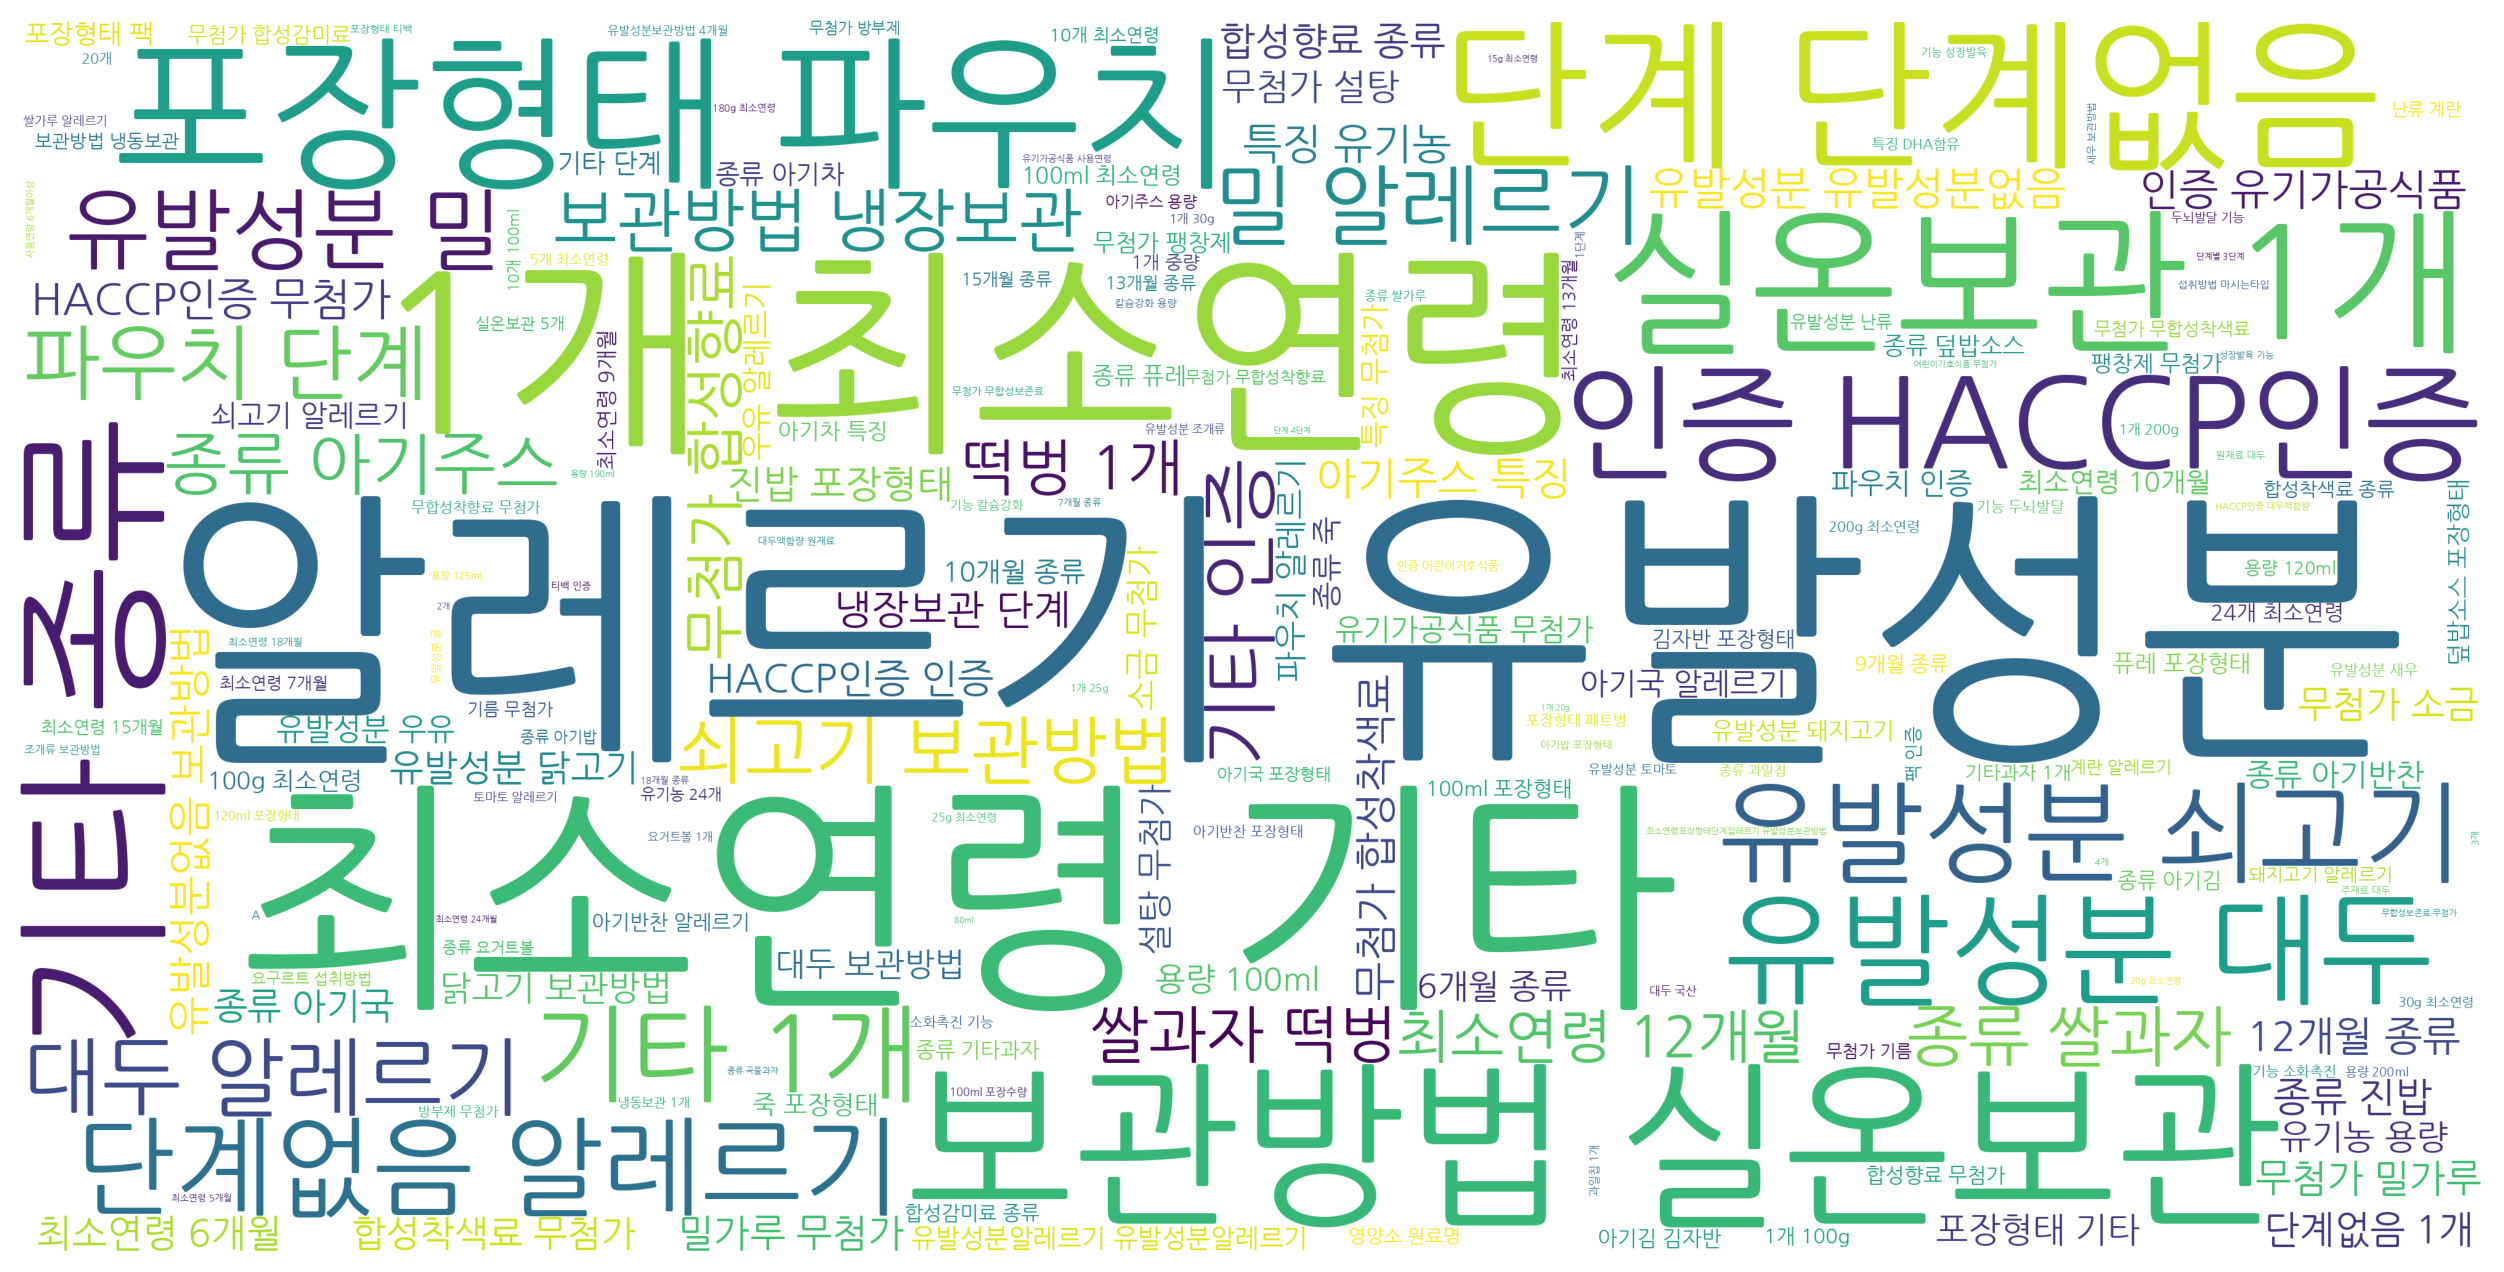

In [ ]:
df5 = ' '.join(df5['제품특성'].dropna())  # NaN 값 제거

title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000, font_path=FONT_PATH).generate(df5)
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

# Sell

In [6]:
train = train.rename(columns={
    '제품': 'Product',
    '대분류': 'Big_cat',
    '중분류': 'Mid_cat',
    '소분류': 'Small_cat',
    '브랜드': 'Brand',
})

In [7]:
# 데이터프레임을 날짜 열을 일자로 변환하고, 피벗하여 구조를 변경
train = train.melt(id_vars=['ID', 'Product', 'Big_cat', 'Mid_cat', 'Small_cat', 'Brand'],
                    var_name='time', value_name='sell')
train['time'] = pd.to_datetime(train['time'], format='%Y-%m-%d')

cols = train.columns.tolist()
cols.insert(0, cols.pop(cols.index('time')))
train = train[cols]
train

time     ID           Product         Big_cat         Mid_cat  \
0       2022-01-01      0  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1       2022-01-01      1  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2       2022-01-01      2  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3       2022-01-01      3  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4       2022-01-01      4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
...            ...    ...               ...             ...             ...   
7293505 2023-04-04  15885  B002-03799-00002  B002-C001-0003  B002-C002-0008   
7293506 2023-04-04  15886  B002-03799-00003  B002-C001-0003  B002-C002-0008   
7293507 2023-04-04  15887  B002-03799-00004  B002-C001-0003  B002-C002-0008   
7293508 2023-04-04  15888  B002-03799-00005  B002-C001-0003  B002-C002-0008   
7293509 2023-04-04  15889  B002-03799-00010  B002-C001-0002  B002-C002-0004   

              Small_cat       Brand  sell  
0        B002-C003-0038  B002-00001     0  
1        B002-C003-0044  B002-00002     0  
2        B002-C003-0044  B002-00002     0  
3        B002-C003-0044  B002-00002     0  
4        B002-C003-0003  B002-00003     0  
...                 ...         ...   ...  
7293505  B002-C003-0042  B002-03799     0  
7293506  B002-C003-0044  B002-03799     3  
7293507  B002-C003-0044  B002-03799     0  
7293508  B002-C003-0044  B002-03799     2  
7293509  B002-C003-0020  B002-03799     0  

[7293510 rows x 8 columns]

In [8]:
def datetime(df):
    # df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['day_of_week'] = df['time'].dt.day_of_week # 0 = Sunday
    df['quarter'] = df['time'].dt.quarter
    # df['week_of_year'] = df['날짜'].dt.weekofyear
    return df
train = datetime(train)

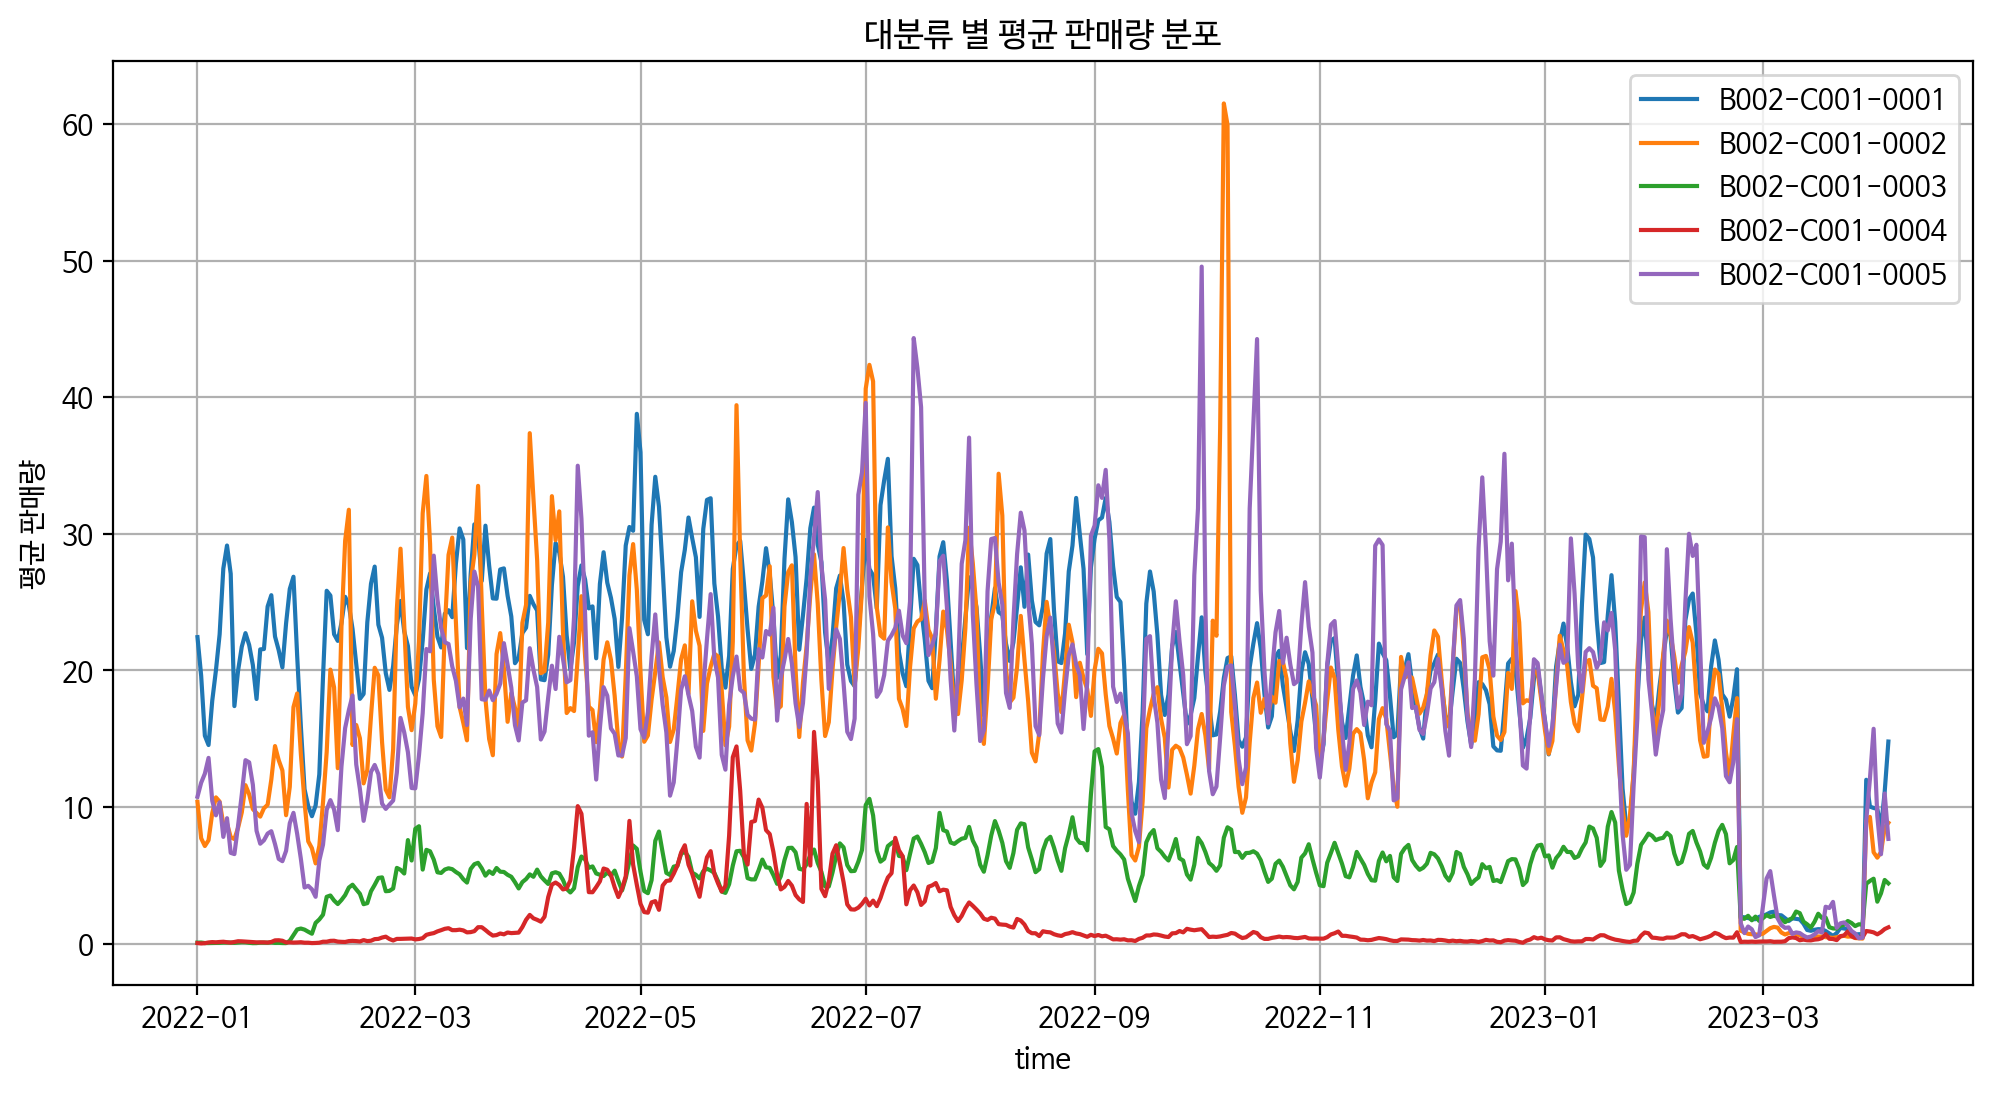

In [9]:
# 대분류 별 판매량 평균 계산
avg_sales_by_category = train.groupby(['Big_cat', 'time'])['sell'].mean().reset_index()

# 대분류 별 판매량 분포 시각화
categories = avg_sales_by_category['Big_cat'].unique()

plt.figure(figsize=(12, 6))
for category in categories:
    category_data = avg_sales_by_category[avg_sales_by_category['Big_cat'] == category]
    plt.plot(category_data['time'], category_data['sell'], label=category)

plt.xlabel('time')
plt.ylabel('평균 판매량')
plt.title('대분류 별 평균 판매량 분포')
plt.legend()
plt.grid()
plt.show()

In [10]:
# ID 별로 데이터를 분할하여 ACF 그래프 그리기
unique_ids = train['ID'].unique()

for id_value in unique_ids:
    id_data = train[train['ID'] == id_value]['sell']

    plt.figure(figsize=(8, 4))
    plot_acf(id_data, lags=20, title=f'ACF for ID {id_value}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
# 시계열 데이터프레임에서 Product 열과 판매량 열 선택
selected_columns = ['Product', 'sell']  # 'sell' 대신 적절한 수치 데이터 열을 선택해야 합니다.
subset_df = train[selected_columns]

# 각 제품에 대한 ADF 검정 수행 및 p-value 출력
unique_products = subset_df['Product'].unique()

for product in unique_products:
    product_series = subset_df[subset_df['Product'] == product]['sell'].values
    result = adfuller(product_series)

    print(f'Product: {product}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

Product: B002-00001-00001
ADF Statistic: -3.586874657771906
p-value: 0.006016971215875588

Product: B002-00002-00001
ADF Statistic: -2.737210281334743
p-value: 0.06781761423255614

Product: B002-00002-00002
ADF Statistic: -4.360852333161912
p-value: 0.00034793961868044636

Product: B002-00002-00003
ADF Statistic: -5.211091245921773
p-value: 8.345065720920028e-06

Product: B002-00003-00001
ADF Statistic: -2.843992355340954
p-value: 0.05225934199962091

Product: B002-00003-00002
ADF Statistic: -4.369509657584382
p-value: 0.000335966890580464

Product: B002-00003-00003
ADF Statistic: -3.960463387997967
p-value: 0.0016322895266045875

Product: B002-00003-00004
ADF Statistic: -1.5516293732210695
p-value: 0.507834201702847

Product: B002-00003-00005
ADF Statistic: -3.9177272204495055
p-value: 0.0019081895104180247

Product: B002-00003-00006
ADF Statistic: -3.380457619193678
p-value: 0.011643386272896348

Product: B002-00003-00007
ADF Statistic: -3.773032641331903
p-value: 0.00319559619710072

KeyboardInterrupt: ignored

* p-value가 0.05이상이 다수 보임
* 각 브랜드별, 분류별 차분 값을 다르게 설정해야 할 듯 하다.